<a href="https://colab.research.google.com/github/subhanreddy/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

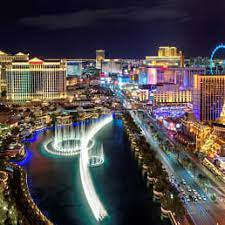

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv

In [ ]:
df_data_path = '/content/Hotel Bookings.csv'
df = pd.read_csv(df_data_path)



We check how many rows has the dataset

In [ ]:
len(df.index)

119390

Very good! now we know that our dataset has 119390 rows.

Now lets check how many cells are missing from our dataset.

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Lets give a closer look to what we have.

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


a) Cancelled bookings
Lets see how many  bookings per month there are

In [ ]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    75166
1    44224
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


During the year, we have a 37.13% of cancelations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


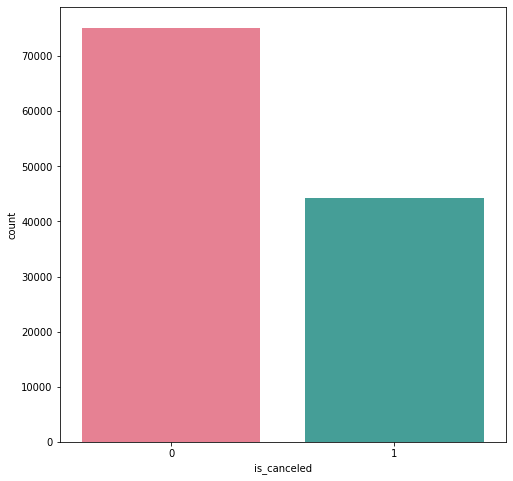

In [ ]:
plt.figure(figsize=(8,8))

#Canceled=1, Not canceled= 0
sns.countplot(df['is_canceled'], palette='husl')
plt.show()

Here we will check the country of origin. Categories are represented in the ISO 3155–3:2013 format.

In [ ]:
df.country.value_counts(normalize=True)

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

Now lets check the arrival date by months

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


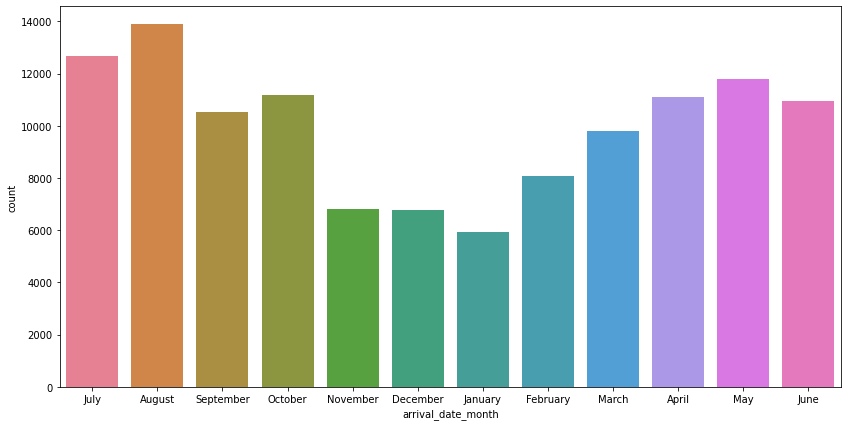

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_month'], palette='husl')
plt.show()

Lets check the Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [ ]:
df.market_segment.value_counts(normalize=True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


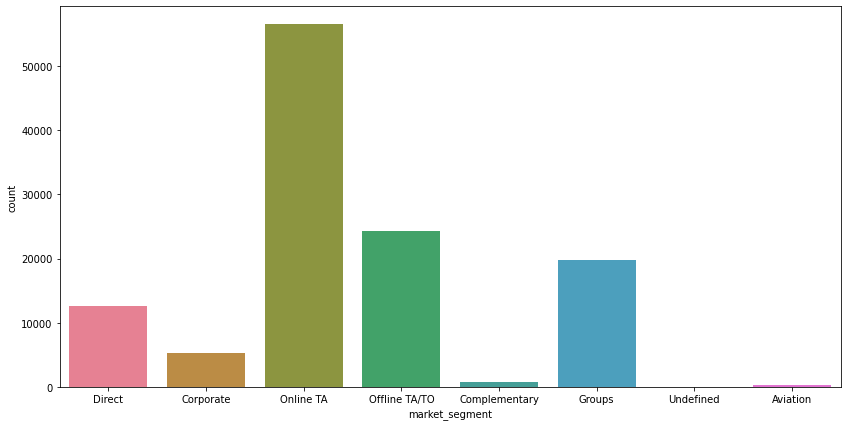

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['market_segment'], palette='husl')
plt.show()

Year of arrival date

In [ ]:
df.arrival_date_year.value_counts(normalize=True)

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


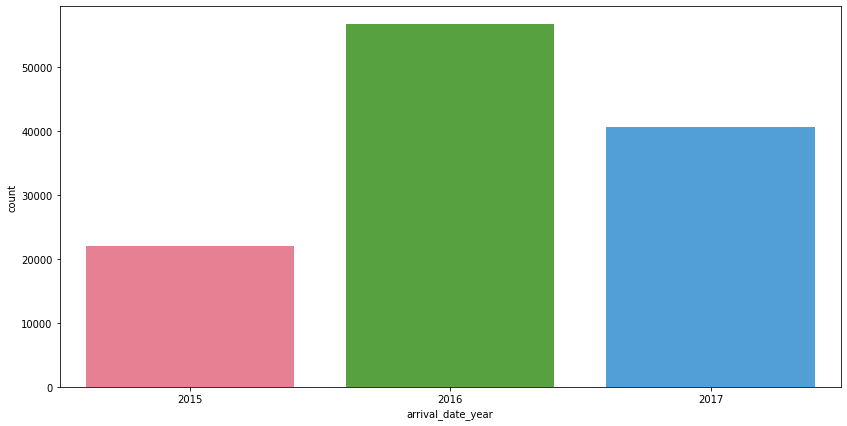

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_year'], palette='husl')
plt.show()

Type of meal booked. Categories are presented in standard hospitality meal packages:

Undefined/SC — no meal package;
BB — Bed & Breakfast;
HB — Half board (breakfast and one other meal — usually dinner);
FB — Full board (breakfast, lunch and dinner)


In [ ]:
df.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


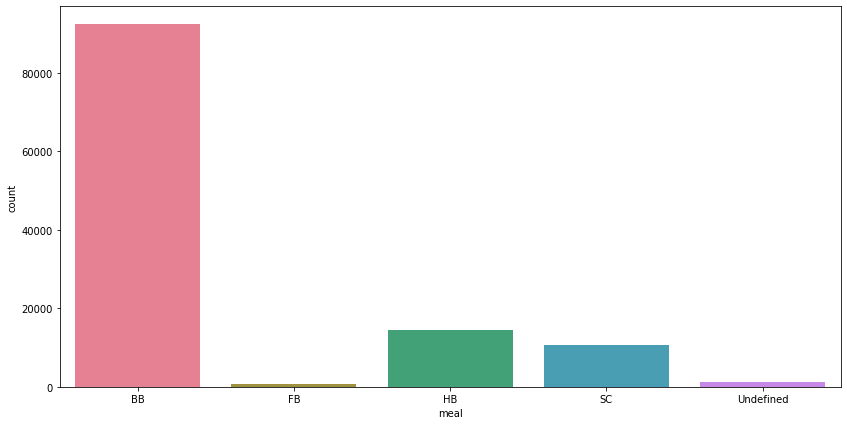

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['meal'], palette='husl')
plt.show()

Type of booking, assuming one of four categories:

Contract — when the booking has an allotment or other type of contract associated to it;
Group — when the booking is associated to a group;
Transient — when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party — when the booking is transient, but is associated to at least other transient booking

In [ ]:
df.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


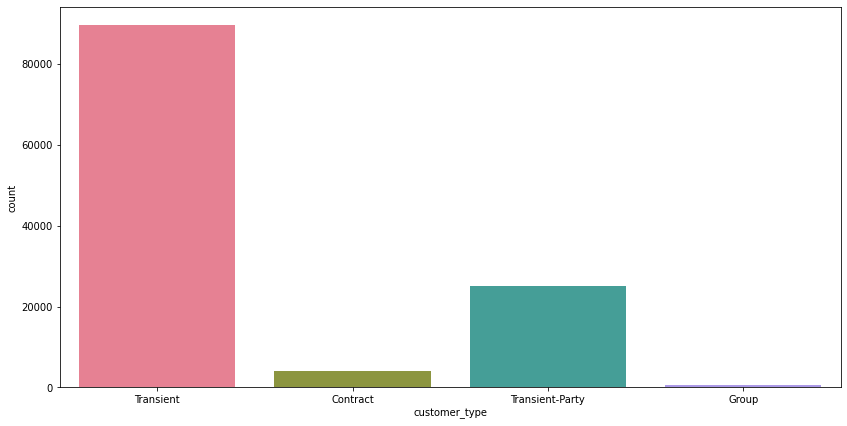

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['customer_type'], palette='husl')
plt.show()

Code of room type reserved. Code is presented instead of designation for anonymity reasons.



In [ ]:
df.reserved_room_type.value_counts(normalize=True)

A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


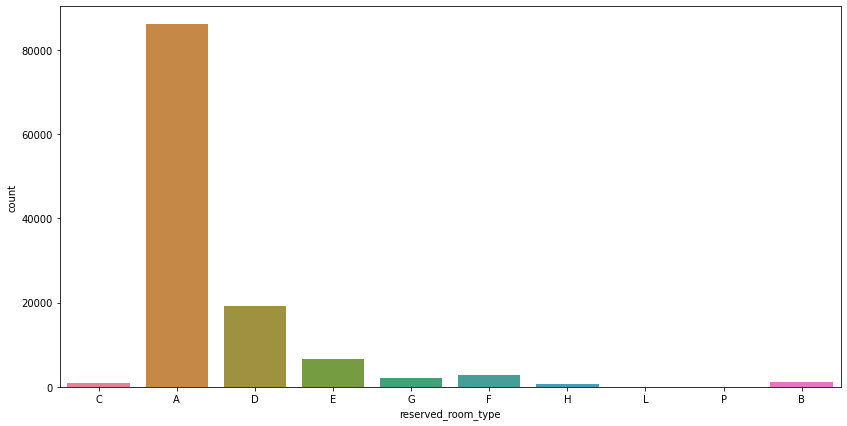

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['reserved_room_type'], palette='husl')
plt.show()

Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

In [ ]:
df.assigned_room_type.value_counts(normalize=True)

A    0.620261
D    0.212095
E    0.065382
F    0.031418
G    0.021384
C    0.019893
B    0.018117
H    0.005964
I    0.003040
K    0.002337
P    0.000101
L    0.000008
Name: assigned_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


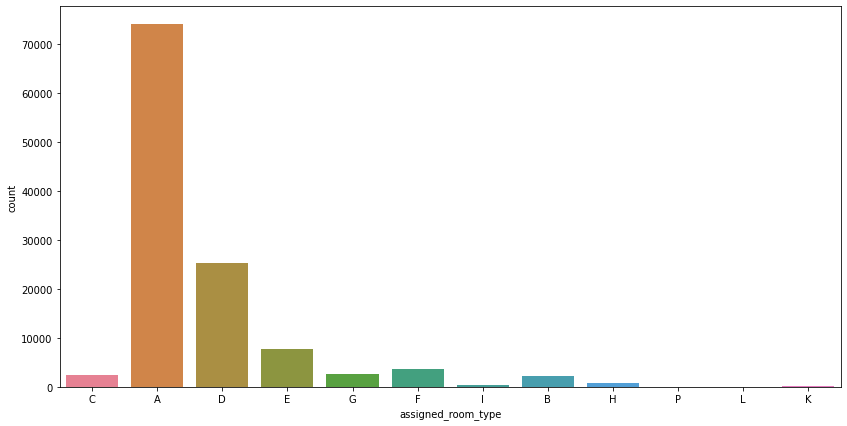

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['assigned_room_type'], palette='husl')
plt.show()

Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation



In [ ]:
df.booking_changes.value_counts(normalize=True)

0     0.848597
1     0.106382
2     0.031870
3     0.007764
4     0.003149
5     0.000988
6     0.000528
7     0.000260
8     0.000142
9     0.000067
10    0.000050
13    0.000042
14    0.000042
15    0.000025
16    0.000017
17    0.000017
12    0.000017
11    0.000017
20    0.000008
21    0.000008
18    0.000008
Name: booking_changes, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


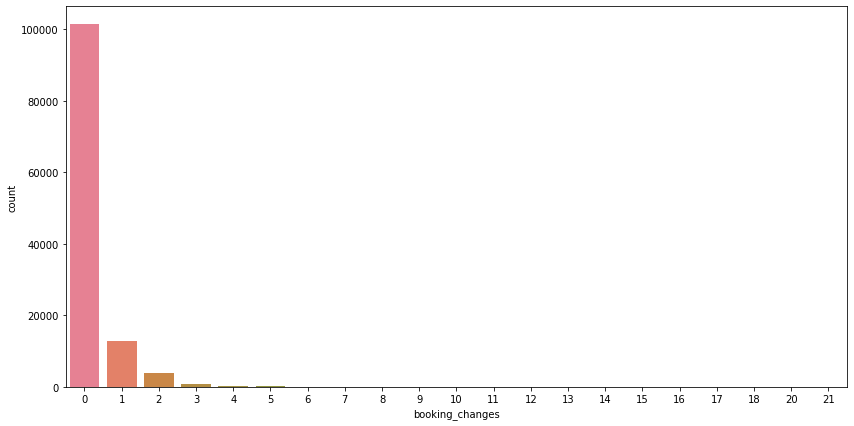

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['booking_changes'], palette='husl')
plt.show()

Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [ ]:
df.distribution_channel.value_counts(normalize=True)


TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


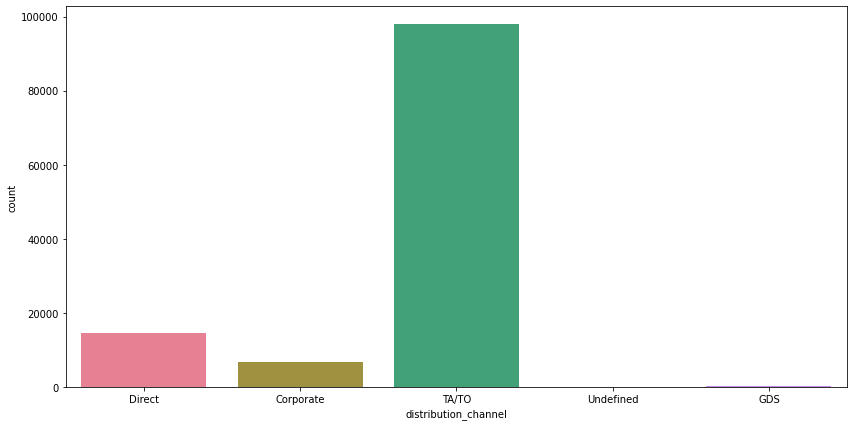

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['distribution_channel'], palette='husl')
plt.show()

In [ ]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


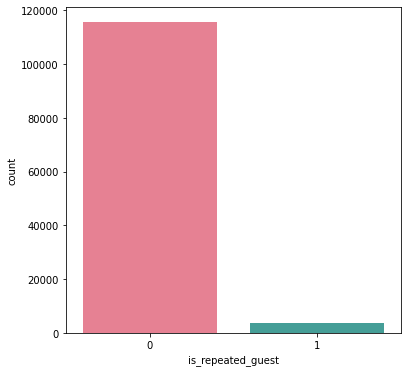

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['is_repeated_guest'], palette='husl')
plt.show()

Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

No Deposit — no deposit was made;
Non Refund — a deposit was made in the value of the total stay cost;
Refundable — a deposit was made with a value under the total cost of stay.

In [ ]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


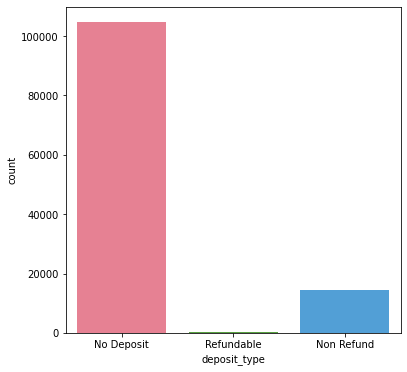

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['deposit_type'], palette='husl')
plt.show()

Number of car parking spaces required by the customer.

In [ ]:
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.937884
1    0.061839
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


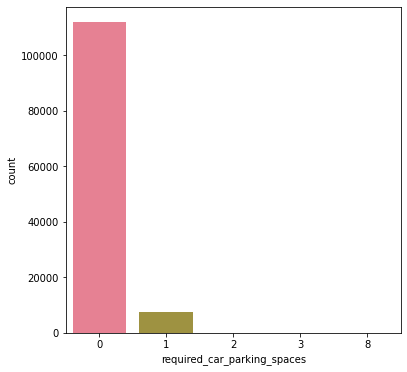

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.show()


Total members per reservation

In [ ]:
df.total_of_special_requests.value_counts(normalize=True)

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


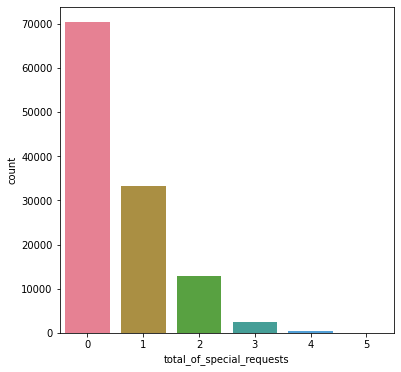

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['total_of_special_requests'], palette='husl')
plt.show()

Reservation last status, assuming one of three categories:

Canceled — booking was canceled by the customer;
Check-Out — customer has checked in but already departed;
No-Show — customer did not check-in and did inform the hotel of the reason why

In [ ]:
df.reservation_status.value_counts(normalize=True)

Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


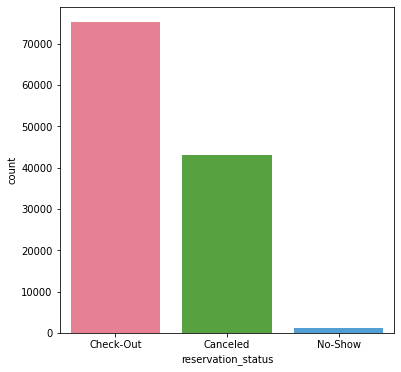

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'], palette='husl')
plt.show()

Lets see the proportion of reservations between hotel types.



In [ ]:
df.hotel.value_counts(normalize=True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


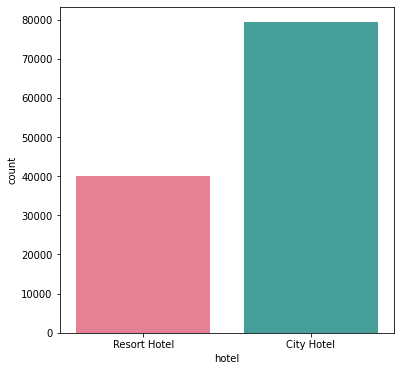

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['hotel'], palette='husl')
plt.show()

Average Daily Rate (ADR)

Here, we can see prices for resort hotels are higher and fluctuate more than city hotels.

For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

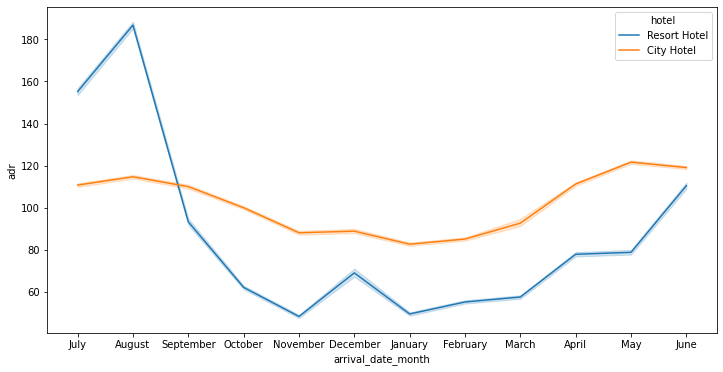

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

Which are the three most common and uncommon countries of origin?


In [ ]:
print('Most common countries:')
print(df.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(df.country.value_counts().tail(35))

Most common countries:
PRT    48590
GBR    12129
FRA    10415
Name: country, dtype: int64
--------------------------------------------------

 Most uncommon countries:
TGO    2
UGA    2
KNA    2
RWA    2
SYC    2
KIR    1
SDN    1
NCL    1
AIA    1
ASM    1
FJI    1
ATF    1
LCA    1
GUY    1
PYF    1
DMA    1
SLE    1
MRT    1
NIC    1
BDI    1
PLW    1
MLI    1
CYM    1
BFA    1
MDG    1
MMR    1
NPL    1
BHS    1
UMI    1
SMR    1
DJI    1
BWA    1
HND    1
VGB    1
NAM    1
Name: country, dtype: int64


As we can see, Portugal tops the list with 48,586 of the cases, followed by Great Britain with 12,129 and France with 10,415.

There are 30 countries that can be considered as the most uncommon country of origin, with 1 guest per country. Among these, we have Madagascar, Dominica, Mali, Guyana, Palau, Kiribati, Sudan, etc.

Which are the months of highest and least occupation?

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

The month of highest occupation is august with 11.65% of the reservations. The month of lest occupation is january with 4.94% of the reservations.

What is the most popular meal package?



In [ ]:
df.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

The Bed & Breakfast option is the most popular, with a frequency of 77.26%.

Which is the most reserved room type?



In [ ]:
df.reserved_room_type.value_counts(normalize=True)

A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

The “A” room type is the most popular among the clients, with 71.99% of the reservations.

How many bookings changes have been done during the studied period?



In [ ]:
df.booking_changes.sum()

26400

There were 25,829 registered changes in the bookings during this period.

How many people have been registered in the hotel?

In [ ]:
df.total_of_special_requests.sum()

68215

68215 people have been registered in the hotel.

 How many car parking spaces have been used?



In [ ]:
df.required_car_parking_spaces.sum()

7464

What is the most common customer type?

In [ ]:
df.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

Inferences and Conclusion
The majority of guests come from western europe countries.
the majority of reservations are for city hotels.
The number of repeated guests is too low.
The majority of reservations converts into successful transactions.

Trasients are the most common customer type, they represent 75% of the total customers.